# Homework 6: Exploring Study Reflection Responses 🗞

Name: Mahoto Sasaki

Student ID: 467695

Collaborators:


## Instructions

In this homework, we will be reviewing the exploratory data analysis (EDA) process. It might be helpful to review **Lab 2 (Analyzing the MoMA Data)** first. Most of the things we ask you to do in this homework are explained in the lab. In general, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Additionally, note that this homework will have a slightly different structure than in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the EDA process and you will need to fill in the analysis and structure as you go.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

### Submission instructions
* Submit this python notebook including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. Introduction

For our EDA this week, we'll take a look at _anonymized_ exam study reflection responses. You will find a blank copy of the reflection survey in `utility/data` along with a CSV containing the data and a README.txt file that explains what each value represents. Our goal will be to use this dataset to gain some insight about how students study and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later.

### Problem 1

Let's take a look at the files in `utility/data` and think about what we can and will need to do with it.

**Write-up!** Describe the data in `MidtermStudyReflection.csv`, answering questions including, but not limited to, these: How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> `Hint` Consider the steps of EDA; what would you like to know about this dataset. 

### Problem 2

Let's do some data wrangling. Considering your description of the dataset from [Problem 1](#Problem-1), how should we clean this data?

In the cells below, explain and perform the steps that you need to prepare this data for further analysis. Make sure that your analysis and work is presented well and effectively communicates your work. 
> `Hint` While our labs are not perfect, you can use them as an example of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

In [2]:
# this one is free!

#1. Get the data and gain basic understanding
import pandas as pd
data = pd.read_csv("./utility/data/MidtermStudyReflection.csv")

#2. Wrangle the data
#This step is primarily cleaning and formatting data. Before we start messing with the data we want to make it cleaner by
#only having columns that are useful for answering our question and we want our data to have feature names that are 
#concise. We also want to filter out values of a data set if they do not make sense. Ex: -1 in midterm score
#In this case the columns containing the questions for what the Hardest Concept was and Why the Exam was Hard are dropped
#because they are hard to assess since they are typed responses and we are only interested in features that could
#possibly predict our midterm scores
columnNames = ['Midterm Score', 'Reviewing Slides', 'Attending Lecture', 'Taking Lecture Notes', 
               'Reviewing Lecture Notes', 'Completing Assigned Readings', 'Attending Study Group', 'Talking With Professor/TA', 
                'Reviewing Homeworks', 'Reviewing Labs', 'Studying With One Student From Class', 'Reviewing Past Quizzes', 
                'Completing Worksheet Problems', 'Study Group With Other Students/Friends', 'Alone', 'Hours Studied', 
                'Tutor / Friend Not in this Class', 'Hardest Concept to Grasp', 'Days Studied Before Exam', 'Why Exam was Hard']
data.columns = columnNames
not_interested = ['Hardest Concept to Grasp', 'Why Exam was Hard']
data = data.drop(not_interested, axis=1)
data = data[data['Midterm Score'] >= 0]

### Problem 3

Now that we cleaned up our data, we are ready to look into it. In this problem, we want to profile our data and explore single variables.
> `Hint` Note that the way the data is stored does not necesarily mean that each column should correspond to a seperate variable. Feel free to define your own variables based on the input data. Looking at the study reflection form might be helpful to figure out meaningful representations. Also note that there is no right or wrong representation here (since it is your job to find something interesting in the data, it is also up to you to choose  the data representation). Again, you might want to iterate over this step again later after doing some more exploration. 

Recall from Lab 2, this step usually involves computing summary statistics and basic plots _where applicable_. Try plotting some of the data (with appropriate plots). Then, highlight a few of the more interesting ones and discuss why you thought they were interesting — for both our sakes, **please only include the most interesting ones** in your actual submission. 

Once again, we have provided a _free_ cell for you to use; make as many as you need. Use text cells to describe what you are doing and what your findings are. 

mean: 79.72988505747126
median: 80.5
standard deviation: 8.823134428842467
min: 57.0
max: 96.5



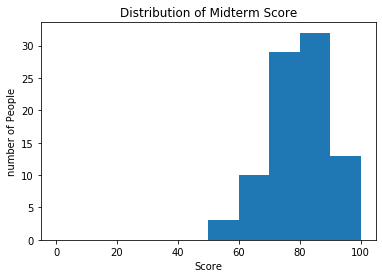

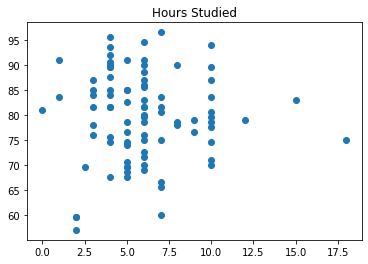

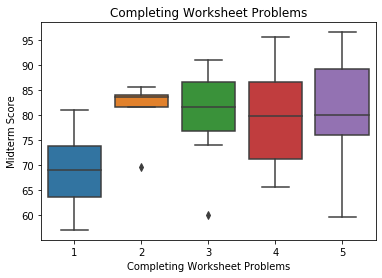

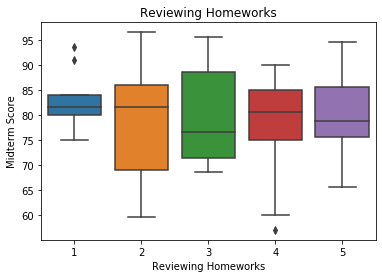

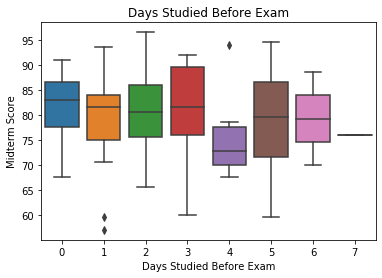

In [3]:
# this one is also free!
from matplotlib import pyplot as plt
import seaborn as sns

print(f'mean: {data["Midterm Score"].mean()}')
print(f'median: {data["Midterm Score"].median()}')
print(f'standard deviation: {data["Midterm Score"].std()}')
print(f'min: {data["Midterm Score"].min()}')
print(f'max: {data["Midterm Score"].max()}')
print()

# Do not consider examples where the value = NaN
plt.hist(data['Midterm Score'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title("Distribution of Midterm Score")
plt.xlabel("Score")
plt.ylabel("number of People")
plt.show()


#Reviewing Slides
#plt.bar(data['Reviewing Slides'].value_counts().keys(),data['Reviewing Slides'].value_counts().values)
#plt.title("Reviewing Slide Distribution")
#plt.ylabel("Number of People")
#plt.show()

# #Attending Lecture
# plt.bar(data['Attending Lecture'].value_counts().keys(),data['Attending Lecture'].value_counts().values)
# plt.title("Attending Lecture Distribution")
# plt.ylabel("Number of People")
# plt.show()

# #Lecture Notes
# plt.bar(data['Taking Lecture Notes'].value_counts().keys(),data['Taking Lecture Notes'].value_counts().values)
# plt.title("Taking Lecture Notes Distribution")
# plt.ylabel("Number of People")
# plt.show()

# #Reviewing Lecture Notes
# plt.bar(data['Reviewing Lecture Notes'].value_counts().keys(),data['Reviewing Lecture Notes'].value_counts().values)
# plt.title("Reviewing Lecture Notes Distribution")
# plt.ylabel("Number of People")
# plt.show()

# #Completing Assigned Readings
# plt.bar(data['Completing Assigned Readings'].value_counts().keys(),data['Completing Assigned Readings'].value_counts().values)
# plt.title("Completing Assigned Readings Distribution")
# plt.ylabel("Number of People")
# plt.show()

# #Attending Study Group
# plt.bar(data['Attending Study Group'].value_counts().keys(),data['Attending Study Group'].value_counts().values)
# plt.title("Attending Study Group Distribution")
# plt.ylabel("Number of People")
# plt.show()

#plt.title("Reviewing Slides")
#plt.scatter(data['Reviewing Slides'], data['Midterm Score'])
#plt.show()

#plt.title("Attending Lecture")
#plt.scatter(data['Attending Lecture'], data['Midterm Score'])
#plt.show()

# plt.title("Taking Lecture Notes")
# plt.scatter(data['Taking Lecture Notes'], data['Midterm Score'])
# plt.show()

# plt.title("Reviewing Lecture Notes")
# plt.scatter(data['Reviewing Lecture Notes'], data['Midterm Score'])
# plt.show()

#plt.title("Completing Assigned Readings")
#plt.scatter(data['Completing Assigned Readings'], data['Midterm Score'])
#plt.show()

# plt.title("Attending Study Group")
# plt.scatter(data['Attending Study Group'], data['Midterm Score'])
# plt.show()

#plt.title("Talking With Professor/TA")
#plt.scatter(data['Talking With Professor/TA'], data['Midterm Score'])
#plt.show()

#plt.title("Reviewing Homeworks")
#plt.scatter(data['Reviewing Homeworks'], data['Midterm Score'])
#plt.show()

#plt.title("Reviewing Labs")
#plt.scatter(data['Reviewing Labs'], data['Midterm Score'])
#plt.show()

#plt.title("Studying With One Student From Class")
#plt.scatter(data['Studying With One Student From Class'], data['Midterm Score'])
#plt.show()

#plt.title("Reviewing Past Quizzes")
#plt.scatter(data['Reviewing Past Quizzes'], data['Midterm Score'])
#plt.show()

#plt.title("Completing Worksheet Problems")
#plt.scatter(data['Completing Worksheet Problems'], data['Midterm Score'])
#plt.show()

#plt.title("Study Group With Other Students/Friends")
#plt.scatter(data['Study Group With Other Students/Friends'], data['Midterm Score'])
#plt.show()

#plt.title("Alone")
#plt.scatter(data['Alone'], data['Midterm Score'])
#plt.show()

plt.title("Hours Studied")
plt.scatter(data['Hours Studied'], data['Midterm Score'])
plt.show()

# plt.title("Tutor / Friend Not in this Class")
# plt.scatter(data['Tutor / Friend Not in this Class'], data['Midterm Score'])
# plt.show()

# plt.title("Days Studied Before Exam")
# plt.scatter(data['Days Studied Before Exam'], data['Midterm Score'])
# plt.show()
# #plt.bar(data['Attending Study Group'].value_counts().keys(),data['Attending Study Group'].value_counts().values)

#https://python-graph-gallery.com/30-basic-boxplot-with-seaborn/
sns.boxplot(x=data['Completing Worksheet Problems'] ,y=data['Midterm Score']).set_title("Completing Worksheet Problems")
plt.show()
sns.boxplot(x=data['Reviewing Homeworks'] ,y=data['Midterm Score']).set_title("Reviewing Homeworks")
plt.show()
sns.boxplot(x=data['Days Studied Before Exam'] ,y=data['Midterm Score']).set_title("Days Studied Before Exam")
plt.show()

#               'Midterm Score', 'Reviewing Slides', 'Attending Lecture', 'Taking Lecture Notes', 
#               'Reviewing Lecture Notes', 'Completing Assigned Readings', 'Attending Study Group', 'Talking With Professor/TA', 
#                'Reviewing Homeworks', 'Reviewing Labs', 'Studying With One Student From Class', 'Reviewing Past Quizzes', 
#                'Completing Worksheet Problems', 'Study Group With Other Students/Friends', 'Alone', 'Hours Studied', 
#                'Tutor / Friend Not in this Class', 'Hardest Concept to Grasp', 'Days Studied Before Exam', 'Why Exam was Hard'

## 3. Asking the Hard Questions

By now we should know all of the ins and outs about this dataset (right?). Let's dive a little deeper into it and see if we can find anything interesting.

### Problem 4

As you worked through the initial phase our this homework, did anything catch your interest? Let's formulate some questions and hypotheses that you could explore in depth.

**Write-up** Formulate and describe a question and a hypothesis to answer it. What inspired your idea (provide specifics from [the last section](#2.-Getting-Familiar-with-the-Data), if any)? How can you use the data to support or reject your hypothesis?

### Problem 5

Let's explore your hypothesis. Find evidence from the data that supports or refutes your hypothesis and present it — recall that as a data scientist, one of you're goals is to discover and communicate your results to your audience, _me_. The more thorough your analysis, the better!

Here's yet another _free_ cell; use as many as you need.

In [96]:
# woah! these things are falling from the sky or something
print("Midterm Avg Score")
midtermAvg = data['Midterm Score'].mean()
print(midtermAvg)
print()
d = data[['Completing Worksheet Problems', 'Midterm Score']]


# print(d[d['Completing Worksheet Problems'] == 1].mean())
# print(d[d['Completing Worksheet Problems'] == 2].mean())
# print(d[d['Completing Worksheet Problems'] == 3].mean())
# print(d[d['Completing Worksheet Problems'] == 4].mean())
# print(d[d['Completing Worksheet Problems'] == 5].mean())

print("Percentage of people who scored lower than midterm average and effort of completing worksheet problems was a 1")
dataSize = len(d.loc[d['Completing Worksheet Problems'] == 1])
numerator = len(d.loc[(d['Midterm Score'] < midtermAvg) & (d['Completing Worksheet Problems'] == 1)])
percentage = numerator/dataSize
print(percentage)

print("Percentage of people who scored lower than midterm average and effort of completing worksheet problems was a 2")
dataSize = len(d.loc[d['Completing Worksheet Problems'] == 2])
numerator = len(d.loc[(d['Midterm Score'] < midtermAvg) & (d['Completing Worksheet Problems'] == 2)])
percentage = numerator/dataSize
print(percentage)

print("Percentage of people who scored lower than midterm average and effort of completing worksheet problems was a 3")
dataSize = len(d.loc[d['Completing Worksheet Problems'] == 3])
numerator = len(d.loc[(d['Midterm Score'] < midtermAvg) & (d['Completing Worksheet Problems'] == 3)])
percentage = numerator/dataSize
print(percentage)

print("Percentage of people who scored lower than midterm average and effort of completing worksheet problems was a 4")
dataSize = len(d.loc[d['Completing Worksheet Problems'] == 4])
numerator = len(d.loc[(d['Midterm Score'] < midtermAvg) & (d['Completing Worksheet Problems'] == 4)])
percentage = numerator/dataSize
print(percentage)

print("Percentage of people who scored lower than midterm average and effort of completing worksheet problems was a 5")
dataSize = len(d.loc[d['Completing Worksheet Problems'] == 5])
numerator = len(d.loc[(d['Midterm Score'] < midtermAvg) & (d['Completing Worksheet Problems'] == 5)])
percentage = numerator/dataSize
print(percentage)


Midterm Avg Score
79.72988505747126

Percentage of people who scored lower than midterm average and effort of completing worksheet problems was a 1
0.8571428571428571
Percentage of people who scored lower than midterm average and effort of completing worksheet problems was a 2
0.2
Percentage of people who scored lower than midterm average and effort of completing worksheet problems was a 3
0.3333333333333333
Percentage of people who scored lower than midterm average and effort of completing worksheet problems was a 4
0.5
Percentage of people who scored lower than midterm average and effort of completing worksheet problems was a 5
0.5


### Problem 6

Did you find anything interesting in [Problem 5](#Problem-5)? If you did, tell me about it. Can you make any recommendations for us? What might we try to improve the class? Don't worry if you didn't anything — you should still tell us about what you found (negative results are results too!).

It would be lovely if you could provide links to key figures in your discussion. See [this StackOverflow question](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown) for details.

### Problem 7

One last step that we shouldn't skip is reviewing the data acquisition method. There are often times where the data you need doesn't exist and you need to go collect it. As you probably already know, making surveys is an art and we would like to here how you might change it to collect better or more information in the future. 
> `Hint` You could discuss something like this: Based on your analysis of the data set, which features were informative and which weren't? What information that was missing from this survey do you think would be helpful to have for next time?

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_.